In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_pandas import CategoricalImputer
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy import stats
from pprint import pprint
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
bank_full = pd.read_csv(r'C:\Users\wangs\Documents\SHAN WANG\SpringBoard-Datascience\Project\BANK MARKETING DATASET\bank-additional\bank-additional-full.csv', sep = ';', na_values = ['unknown', 'nonexistent'])
print (bank_full.head())

   age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school     NaN      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous  poutcome emp.var.rate  \
0         mon  ...         1    999         0       NaN          1.1   
1         mon  ...         1    999         0       NaN          1.1   
2         mon  ...         1    999         0       NaN          1.1   
3         mon  ...         1    999         0       NaN          1.1   
4         mon  ...         1    999         0       NaN          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to see the most important features for a clinet to subscribe and predict if the client will subscribe a term deposit (variable y).


In [3]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          5625 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usag

From the bank_full info, we can see that the dataset has 41,188 row, and 21 columns. Column job, marital, eductaion, default, housing, loan, and poutcome have missing values. 

In [4]:
bank_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The describe data shows a general picture for numeric variables. We can see the that most customers are in the middle ages from 30 – 47 years old.  75% of the phone call duration is below 319 seconds. Most pdays values are 999, which means most client was not previously contacted.Employment variation rate, consumer price index,  consumer confidence index, euribor 3 month rate, and  number of employees are economic related data that reflect the big economic environment. 



In [5]:
#Identify numeric and categorical variables 
total_columns = bank_full.columns
print (total_columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [6]:
num_columns = list(bank_full._get_numeric_data().columns)
print (num_columns)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [7]:
cat_columns = list(set(total_columns) - set(num_columns))
cat_columns.remove('y')
print (cat_columns)
print (type(cat_columns))

['loan', 'marital', 'housing', 'contact', 'month', 'education', 'default', 'day_of_week', 'job', 'poutcome']
<class 'list'>


## Missing Values Imputation

In [8]:
#Find missing value percentage for each column
bank_full.isnull().mean().sort_values(ascending=False)*100

poutcome          86.343110
default           20.872584
education          4.202680
housing            2.403613
loan               2.403613
job                0.801204
marital            0.194231
y                  0.000000
day_of_week        0.000000
contact            0.000000
month              0.000000
duration           0.000000
nr.employed        0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
age                0.000000
dtype: float64

In [9]:
#Find value counts in percentage for pdays column
(bank_full.pdays.value_counts()/bank_full.pdays.count()).sort_index()*100

0       0.036418
1       0.063125
2       0.148101
3       1.065844
4       0.286491
5       0.111683
6       1.000291
7       0.145673
8       0.043702
9       0.155385
10      0.126250
11      0.067981
12      0.140818
13      0.087404
14      0.048558
15      0.058269
16      0.026707
17      0.019423
18      0.016995
19      0.007284
20      0.002428
21      0.004856
22      0.007284
25      0.002428
26      0.002428
27      0.002428
999    96.321744
Name: pdays, dtype: float64

By calculating the percentage of missing values for each column, we can see that 86% of the values in 'poutcoume' (previous outcome) column are missing values.And for pday column, the value of 999 takes up 96% of the rows. We know that 999 means client was not previously contacted. That makes sense because the previous outcome is missing when there is no previous contact. 

In [10]:
bank_full['pdays_cat']=0
bank_full.loc[bank_full['pdays'] <= 5,'pdays_cat'] = '<= 5 days'
bank_full.loc[(bank_full['pdays'] > 5) & (bank_full['pdays']<= 10),'pdays_cat'] = '5-10 days'
bank_full.loc[(bank_full['pdays'] > 10) & (bank_full['pdays']< 999),'pdays_cat'] = '>10 days'
bank_full.loc [bank_full['pdays'] == 999, 'pdays_cat']= 'no contact before'
bank_full['pdays_cat'].unique()
bank_full = bank_full.drop('pdays', axis = 1)
bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no,no contact before
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no,no contact before
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no,no contact before
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no,no contact before
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no,no contact before


In [11]:
cat_columns.append('pdays_cat')
num_columns.remove('pdays')
print ('Categorical:', cat_columns, '\n', 'Numerical:', num_columns)

Categorical: ['loan', 'marital', 'housing', 'contact', 'month', 'education', 'default', 'day_of_week', 'job', 'poutcome', 'pdays_cat'] 
 Numerical: ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


To deal with 'pdays' column, a new column 'pday_cat'is created with categorical values based on the condition of 'pdays' column. The coresponding pdays_cat value is assigned as '<= 5 days', '5-10 days', '>10 days' and 'no contact before' if 'pdays' is 999. The origianl 'pdays' column is dropped.

In [12]:
imputer = CategoricalImputer()
bank_full[cat_columns] = imputer.fit_transform(bank_full[cat_columns].values)

In [13]:
bankcat = bank_full[cat_columns]
enc = preprocessing.OneHotEncoder(handle_unknown ='ignore')
enc.fit(bankcat)
ohe=enc.transform(bankcat).toarray()
ohe_columns = enc.get_feature_names(cat_columns)
print (ohe_columns)
ohdf = pd.DataFrame(ohe, columns=ohe_columns)
ohdf.head()

['loan_no' 'loan_yes' 'marital_divorced' 'marital_married' 'marital_no'
 'marital_single' 'housing_no' 'housing_yes' 'contact_cellular'
 'contact_telephone' 'month_apr' 'month_aug' 'month_dec' 'month_jul'
 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct' 'month_sep'
 'education_basic.4y' 'education_basic.6y' 'education_basic.9y'
 'education_high.school' 'education_illiterate' 'education_no'
 'education_professional.course' 'education_university.degree'
 'default_no' 'default_yes' 'day_of_week_fri' 'day_of_week_mon'
 'day_of_week_thu' 'day_of_week_tue' 'day_of_week_wed' 'job_admin.'
 'job_blue-collar' 'job_entrepreneur' 'job_housemaid' 'job_management'
 'job_no' 'job_retired' 'job_self-employed' 'job_services' 'job_student'
 'job_technician' 'job_unemployed' 'poutcome_failure' 'poutcome_no'
 'poutcome_success' 'pdays_cat_5-10 days' 'pdays_cat_<= 5 days'
 'pdays_cat_>10 days' 'pdays_cat_no contact before']


,loan_no,loan_yes,marital_divorced,marital_married,marital_no,marital_single,housing_no,housing_yes,contact_cellular,contact_telephone,...,job_student,job_technician,job_unemployed,poutcome_failure,poutcome_no,poutcome_success,pdays_cat_5-10 days,pdays_cat_<= 5 days,pdays_cat_>10 days,pdays_cat_no contact before
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
imputed_bank_full=pd.concat([bank_full[num_columns], ohdf, bank_full['y']], axis=1)
imputed_bank_full.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,loan_no,...,job_technician,job_unemployed,poutcome_failure,poutcome_no,poutcome_success,pdays_cat_5-10 days,pdays_cat_<= 5 days,pdays_cat_>10 days,pdays_cat_no contact before,y
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no


In [15]:
'''
#Apply one-hot encoding/dummy coding
bankcat = bank_full[cat_columns]
bankcat_not_null = bankcat[bankcat.notnull().all(1)]
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(bankcat_not_null)
ohe = enc.transform(bankcat_not_null).toarray()
print (ohe)
ohe_columns = enc.get_feature_names(cat_columns)
print (ohe_columns)
'''

"\n#Apply one-hot encoding/dummy coding\nbankcat = bank_full[cat_columns]\nbankcat_not_null = bankcat[bankcat.notnull().all(1)]\nenc = preprocessing.OneHotEncoder(handle_unknown='ignore')\nenc.fit(bankcat_not_null)\nohe = enc.transform(bankcat_not_null).toarray()\nprint (ohe)\nohe_columns = enc.get_feature_names(cat_columns)\nprint (ohe_columns)\n"

In [16]:
'''
#Apply missing value imputation techniques to estimate a guess for the missing entries by using k-nn impute
imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(bank_full[cat_columns])
'''

'\n#Apply missing value imputation techniques to estimate a guess for the missing entries by using k-nn impute\nimputer = KNNImputer(n_neighbors=5)\nimputer.fit_transform(bank_full[cat_columns])\n'

# Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

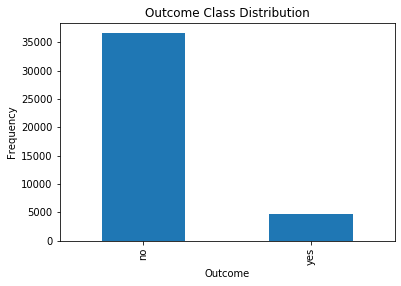

In [18]:
#Plot the outcome 
count_y = pd.value_counts(bank_full.y, sort = True)
count_y.plot(kind= 'bar')
plt.title('Outcome Class Distribution')
plt.xlabel('Outcome')
plt.ylabel('Frequency')

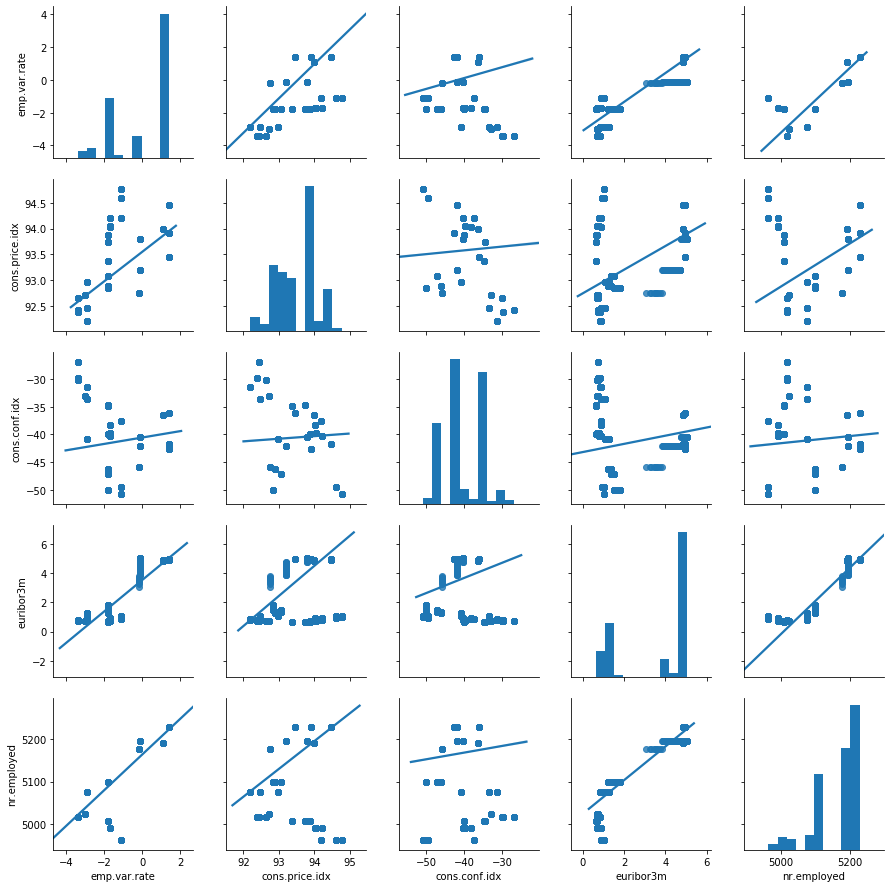

In [19]:
#Plot numerical variables in pairs
in_var = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
sns.pairplot(bank_full[in_var],kind='reg')
plt.show()

Employment variation rate is positively related to consumer price index, Europe's Libor 3 month rate and number of employees.

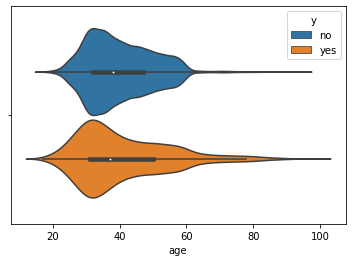

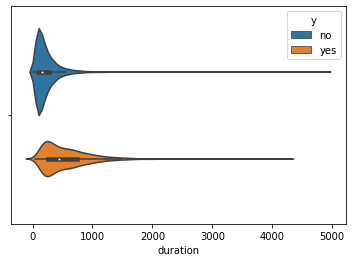

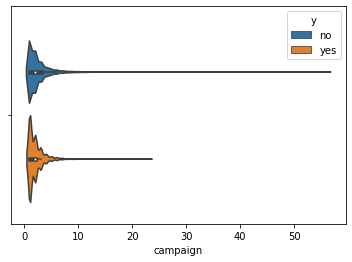

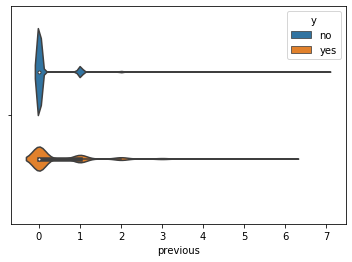

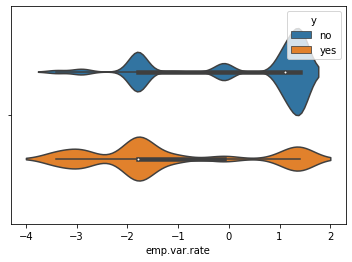

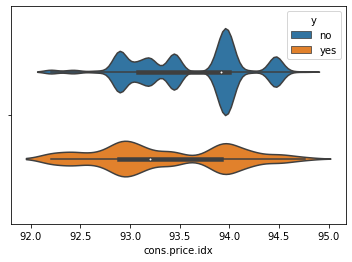

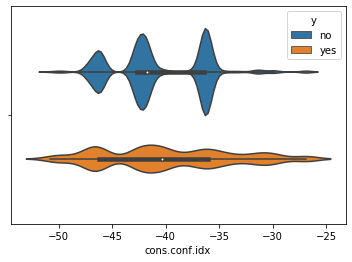

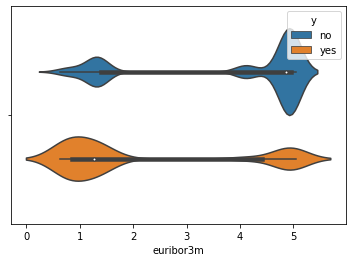

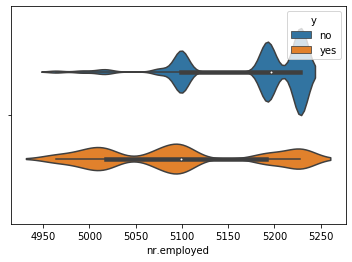

In [20]:
#Plot a box plot of numeric variable within subset of rows where label variable y ‘has the client subscribed a term deposit’ = ‘yes’ vs ‘no’
for var in num_columns:
    sns.violinplot( x=var, y=['']*len(bank_full), data = bank_full, hue ='y')
    plt.show()

The largest group of people is around 30 years old. Most clients are between 20 and 60 years old.
Most phone call duration is below 100 thousand seconds. People who subscribed the term tend to have longer duration over phone.
Most people have been contacted less than 9 times during this campaign.
Most people haven’t been contacted before.
When employment variation rate is around 1.5, more people are not willing to subscribe. When employment variation rate is around -1.9, more people will subscribe. 
When consumer price index is around 94, more people will not subscribe. And most people subscribed when consumer price index is at 92.9 and 94.0.
Consumers tend to not subscribe when the consumer confidential index is around -46, -43, and -36.
More people subscribe when  euribor 3 month rate is below 2, the peak is at 1, while more people don’t subscribe when euribor3m is above 4.
When number of employees is below 5050, more people subscribe. The number of subscribed clients reaches 3 peaks when quarterly number of employees reach 5000, 5090 5230, 

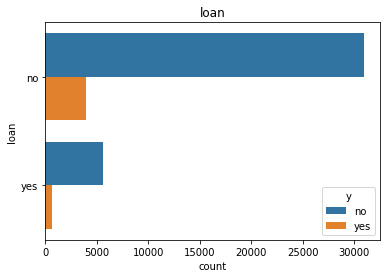

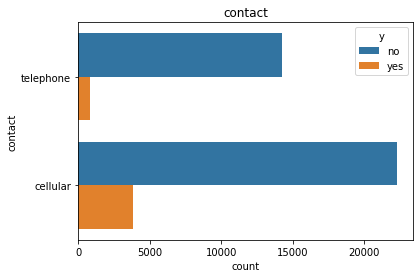

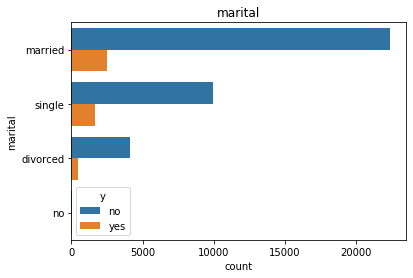

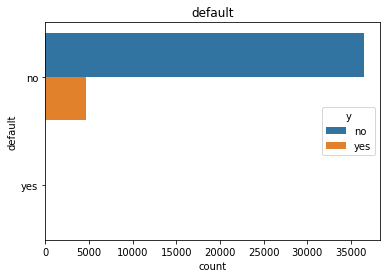

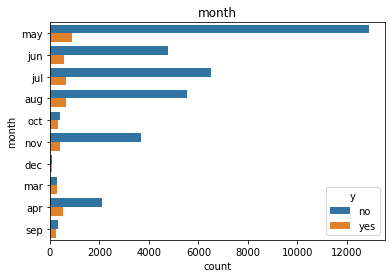

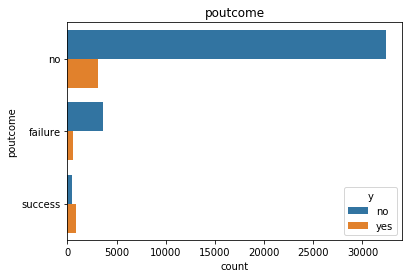

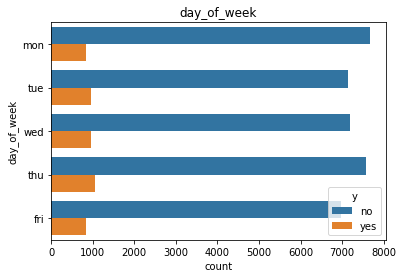

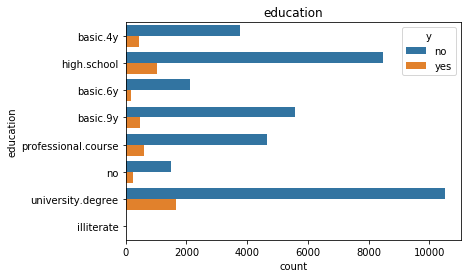

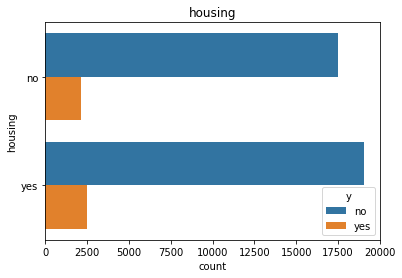

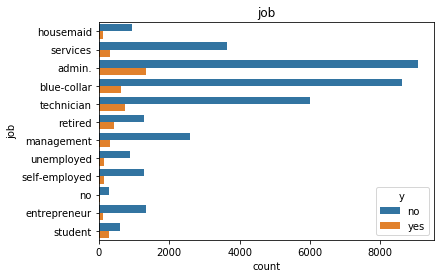

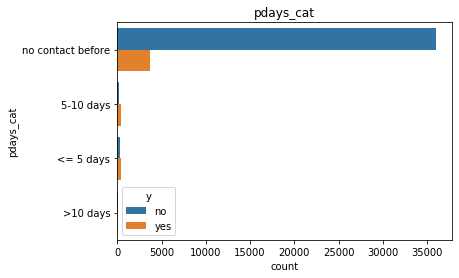

In [21]:
#Countplot for categorial variables
for var in cat_columns:
    sns.countplot(y=var,data = bank_full, hue ='y')
    plt.title(var)
    plt.show()

Observation 1.
Among people who subscribed the term, the largest number is from administrative job. The least number is from entrepreneur and housemaid. Students are more likely to subscribe than other occupations. 

Observation 2.
From the poutcome(previous outcome) count plot, there are more subscribed clients than unsubscribed clients, which means people are more likely to subscribe again if they did previously.

Observation 3.
From the pdays_cat (number of days that passed by after the client was last contacted from a previous campaign) plot, there are more subscribed clients than unsubscribed clients when there is a previous contact less than 10 days ago. 


In [22]:
#Create a corsstable to see the relationship between education and job. The table shows the degree holded by the percentage of clients in each position  
job_education = pd.crosstab(bank_full['job'], bank_full['education']).apply(lambda r: r/r.sum(), axis = 1)
job_education

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,no,professional.course,university.degree
job,,,,,,,,
admin.,0.007388,0.014489,0.047879,0.319420,0.000096,0.023892,0.034830,0.552005
blue-collar,0.250486,0.154096,0.391506,0.094878,0.000864,0.049060,0.048952,0.010158
entrepreneur,0.094093,0.048764,0.144231,0.160714,0.001374,0.039148,0.092720,0.418956
housemaid,0.447170,0.072642,0.088679,0.164151,0.000943,0.039623,0.055660,0.131132
management,0.034200,0.029070,0.056772,0.101915,0.000000,0.042066,0.030438,0.705540
no,0.157576,0.066667,0.093939,0.112121,0.000000,0.396970,0.036364,0.136364
retired,0.347093,0.043605,0.084302,0.160465,0.001744,0.056977,0.140116,0.165698
self-employed,0.065447,0.017593,0.154821,0.083040,0.002111,0.020408,0.118227,0.538353
services,0.033258,0.056941,0.097758,0.675737,0.000000,0.037793,0.054926,0.043588


In [23]:
#Drop unknown values and make contigency tables for default vs outcome y, housing vs outcome y, and loan vs outcome y
bank_full = bank_full[~bank_full['default'].str.contains("unknown")]
bank_full = bank_full[~bank_full['housing'].str.contains("unknown")]
bank_full = bank_full[~bank_full['loan'].str.contains("unknown")]
dflt_y = pd.crosstab(bank_full['default'], bank_full['y'],  dropna = True)
house_y = pd.crosstab(bank_full['housing'], bank_full['y'])
loan_y = pd.crosstab(bank_full['loan'], bank_full['y'])
print (dflt_y, '\n\n', house_y, '\n\n', loan_y)

y           no   yes
default             
no       36545  4640
yes          3     0 

 y           no   yes
housing             
no       17479  2133
yes      19069  2507 

 y        no   yes
loan             
no    30983  3957
yes    5565   683


In [24]:
# Run fisher’s exact test between default vs outcome y,  housing vs outcome y, and loan vs outcome y
con_tables = [dflt_y,house_y,loan_y]
names= [('dflt_oddsratio', 'dflt_pvalue'), ('house_oddsratio','house_pvalue'), ('loan_oddsratio', 'loan_pvalue')]
i=0
for t in con_tables:
    oddsratio, pvalue = stats.fisher_exact(t)
    print (names[i][0],':', oddsratio, names[i][1],':', pvalue)
    i+=1

dflt_oddsratio : 0.0 dflt_pvalue : 1.0
house_oddsratio : 1.0773384056424793 house_pvalue : 0.017706797460646316
loan_oddsratio : 0.9609769078692076 loan_pvalue : 0.3731669615484633


Having a house or not has effect on the outcome

In [25]:
#Apply principal components analysis to numerical variables
pca = PCA(n_components = 2)
pca.fit(bank_full[num_columns])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92626125 0.07183167]
[52624.08039516 14654.66025625]


In [26]:
pca = PCA(n_components=0.8)
n_pca = pca.fit_transform(bank_full[num_columns])
print (bank_full[num_columns].shape, n_pca.shape)

(41188, 9) (41188, 1)


In [27]:
#Apply principal components analysis to one hot encoded data 
pca = PCA(n_components = 2)
pca.fit(ohe)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.11526411 0.09095437]
[159.00425019 141.24512434]


In [28]:
pca = PCA(n_components=0.8)
c_pca = pca.fit_transform(ohe)
print (ohe.shape, c_pca.shape)

(41188, 54) (41188, 16)


## Train/Test Split

In [18]:
# To have a realistic predictive model, duration variable is dropped from numeric columns.
num_columns.remove('duration')
imputed_bank_full= imputed_bank_full.drop(['duration'], axis = 1) 
imputed_bank_full

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,loan_no,loan_yes,...,job_technician,job_unemployed,poutcome_failure,poutcome_no,poutcome_success,pdays_cat_5-10 days,pdays_cat_<= 5 days,pdays_cat_>10 days,pdays_cat_no contact before,y
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,yes
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,yes


In [19]:
yes = imputed_bank_full[imputed_bank_full.y == 'yes']
no = imputed_bank_full[imputed_bank_full.y == 'no']
print (yes.shape, no.shape)

(4640, 63) (36548, 63)


In [20]:
#smote for imbalanced data
X = imputed_bank_full.drop(['y'], axis = 1).values
y = imputed_bank_full['y'].values
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape, y_res.shape

((73096, 62), (73096,))

In [21]:
print ('Original dataset shape {}'.format(Counter(y)))
print ('Resampled dataset shape {}'.format (Counter(y_res)))

Original dataset shape Counter({'no': 36548, 'yes': 4640})
Resampled dataset shape Counter({'no': 36548, 'yes': 36548})


In [22]:
#Divide dataset into trainX, trainY, testX, testY 

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print (X_train.shape)
print (X_test.shape)

(58476, 62)
(14620, 62)


In [23]:
#Standardization,mean removal and variance scaling on the train set
X_train_df = pd.DataFrame(data = X_train, columns = imputed_bank_full.drop(['y'], axis = 1).columns)
X_train_df_num = X_train_df[num_columns]
X_train_scaled_num = preprocessing.scale(X_train_df_num)
X_train_df[num_columns] = X_train_scaled_num
print (X_train_df.shape)

(58476, 62)


In [24]:
#Standardization,mean removal and variance scaling on the test set
X_test_df = pd.DataFrame(data = X_test, columns = imputed_bank_full.drop(['y'], axis = 1).columns)
X_test_df_num = X_test_df[num_columns]
X_test_scaled_num = preprocessing.scale(X_test_df_num)
X_test_df[num_columns] = X_test_scaled_num
print (X_test_df.shape)

(14620, 62)


In [25]:
print (y_train.shape)
print (y_test.shape)

(58476,)
(14620,)


# Random Forest Model

In [26]:
clf = RandomForestClassifier(max_depth=None, random_state=42, n_estimators =125, max_features= 'sqrt') 
clf.fit(X_train_df, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
y_predict = clf.predict(X_test_df)
print(y_predict)

['yes' 'no' 'yes' ... 'no' 'yes' 'no']


In [28]:
#Predict class probabilities for X_test
rf_probs = clf.predict_proba(X_test_df)[:,1]
print ('rf_probs: ', rf_probs)
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_value = metrics.roc_auc_score(y_test, rf_probs)
print ('roc_value: ', roc_value)
# Model Accuracy, how often is the classifier correct?
print ('Score: ', clf.score(X_test_df, y_test))

rf_probs:  [0.88       0.088      0.936      ... 0.312      1.         0.17373333]
roc_value:  0.9737142732667292
Score:  0.9331737346101231


# Use Randomsearch for Best Parameters 

In [29]:
#Create a random forest and examine the default values
# Get default hyperparameters
rf = RandomForestClassifier(random_state = 42)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [30]:
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)

# Number of features to consider at every split
max_features = ['auto', 'sqrt']


# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 10)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 77, 105, 133, 161, 188, 216, 244, 272, 300]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train_df, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 17.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [32]:
rf_random.best_params_

{'n_estimators': 244,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 87,
 'bootstrap': False}

In [33]:
#compare the base model with the best random search model
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train_df, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
base_y_predict = base_model.predict(X_test_df)
base_rf_probs = base_model.predict_proba(X_test_df)[:,1]
print ('base_model rf_probs: ',base_rf_probs)
base_roc_value = metrics.roc_auc_score(y_test, base_rf_probs)
print ('base_model roc_value: ',base_roc_value)
base_score = base_model.score(X_test_df, y_test)
print ('base_model score: ', base_score)

base_model rf_probs:  [1.  0.1 0.9 ... 0.2 1.  0. ]
base_model roc_value:  0.9670226502114243
base_model score:  0.9286593707250342


In [35]:
best_random = rf_random.best_estimator_
print (best_random)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=87, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=244,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [36]:
best_y_predict = best_random.predict(X_test_df)
best_rf_probs = best_random.predict_proba(X_test_df)[:,1]
print ('best_random rf_probs: ', best_rf_probs)
best_roc_value=metrics.roc_auc_score(y_test, best_rf_probs)
print ('best_random rf_probs: ', best_roc_value)
best_score = best_random.score(X_test_df, y_test)
print ('best_random score: ', best_score)

best_random rf_probs:  [0.89057926 0.08566313 0.96973943 ... 0.28090245 0.9976776  0.12857134]
best_random rf_probs:  0.9743941943141443
best_random score:  0.9362517099863201


In [37]:
print('Improvement of {:0.2f}%.'.format( 100 * (best_score - base_score) / base_score))

Improvement of 0.82%.


In [99]:
#Generate confusion matrix for best_random
tn, fp, fn, tp = metrics.confusion_matrix(y_test, best_y_predict).ravel()
print ('true negative:',tn,'\n','false posotive:',fp,'\n', 'false negative:', fn, '\n','true positive:', tp)

true negative: 6919 
 false posotive: 413 
 false negative: 519 
 true positive: 6769


Text(0.5, 1.0, 'Confusion Matrix')

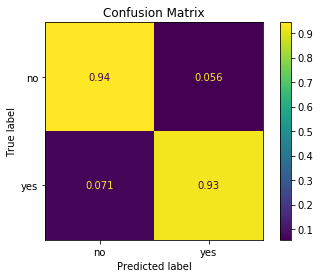

In [100]:
cm = metrics.plot_confusion_matrix(best_random, X_test_df, y_test,normalize = 'true')
cm.ax_.set_title('Confusion Matrix')                              

In [101]:
#Plot ROC curve for best_random
fpr, tpr, threshold = metrics.roc_curve(y_test, best_rf_probs, pos_label = 'yes')
roc_auc = metrics.auc(fpr, tpr)

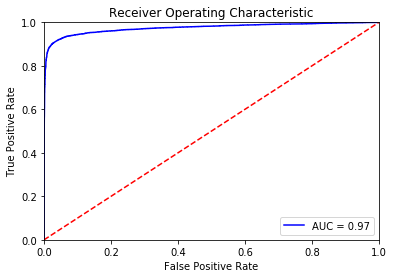

In [102]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Grid Search with Cross Validation

In [103]:
# Create a parameter grid based on the best_estimator from random search result
param_grid = {
'n_estimators': [100, 200, 300, 1000],
 'min_samples_split':[4, 5, 6],
 'min_samples_leaf': [1,2,3],
 'max_features': ['sqrt', 3, 5],
 'max_depth': [50, 70, 90, 110],
 'bootstrap': [False]
}
pprint(param_grid)

{'bootstrap': [False],
 'max_depth': [50, 70, 90, 110],
 'max_features': ['sqrt', 3, 5],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [4, 5, 6],
 'n_estimators': [100, 200, 300, 1000]}


In [104]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)   
# Fit the grid search to the data
grid_search.fit(X_train_df, y_train)
# Find the best prameters
grid_search.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 89.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 157.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 249.2min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 318.4min finished


{'bootstrap': False,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [109]:
best_grid = grid_search.best_estimator_
best_grid_predict = best_grid.predict(X_test_df)

In [111]:
grid_rf_probs = best_grid.predict_proba(X_test_df)[:,1]
print ('best grid rf_probs: ',grid_rf_probs)
grid_roc_value=metrics.roc_auc_score(y_test, grid_rf_probs)
print ('best grid rf_probs: ', grid_roc_value)
grid_score = best_grid.score(X_test_df, y_test)
print ('best grid score: ', grid_score)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_score - base_score) / base_score))

best grid rf_probs:  [0.87925    0.07388333 0.96786667 ... 0.28031667 0.99043333 0.16006667]
best grid rf_probs:  0.9759792326526187
best grid score:  0.9376196990424076
Improvement of 0.96%.


By comparing the result of random search and grid search, grid search improves 0.96% from the base model, while random search improves 0.82%. It is clear that grid search is performing better.Hence, we select grid search with selected important features to predict if a client will subscribe or not.

In [119]:
feature_importances = pd.DataFrame(best_grid.feature_importances_, index =imputed_bank_full.drop(['y'], axis = 1).columns, columns = ['Importance']).sort_values(by='Importance', ascending=False)
feature_importances = feature_importances[:10]
print (feature_importances[:10])

                             Importance
euribor3m                      0.075625
age                            0.049688
nr.employed                    0.047851
campaign                       0.040491
emp.var.rate                   0.039095
day_of_week_mon                0.030047
education_university.degree    0.027837
housing_no                     0.027235
cons.conf.idx                  0.027178
housing_yes                    0.026688


[Text(0, 0, 'euribor3m'),
 Text(0, 0, 'age'),
 Text(0, 0, 'nr.employed'),
 Text(0, 0, 'campaign'),
 Text(0, 0, 'emp.var.rate'),
 Text(0, 0, 'day_of_week_mon'),
 Text(0, 0, 'education_university.degree'),
 Text(0, 0, 'housing_no'),
 Text(0, 0, 'cons.conf.idx'),
 Text(0, 0, 'housing_yes')]

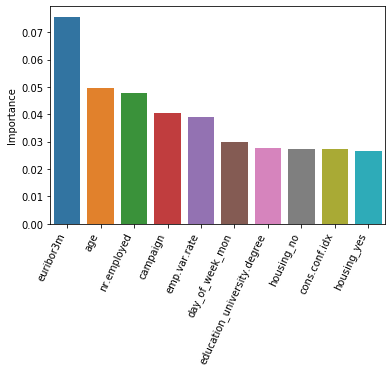

In [120]:
#plot feature importance
feature_importances
ax = sns.barplot(x=feature_importances.index, y =feature_importances.Importance)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

From above feature importance table and chart, we can see that  Europe's Libor rate ('euribor3m'),  client's age ('age'), number of employees (nr.employed), number of contacts performed during this campaign and for a client  ('campaign'), employment variation rate ('emp.var.rate'), contact on Monday (day_of_week_mon), client who has university degree (education_university_degree), client who doesn't own a house (housing_no), consumer confidential index (cons.conf.idx),  client who owns a house (housing_yes) are the imporatant features that drive the decision of the customer to subscribe the term deposit.

In [121]:
#Generate confusion matrix for best_grid
tn, fp, fn, tp = metrics.confusion_matrix(y_test, best_grid_predict).ravel()
print ('true negative:',tn,'\n','false posotive:',fp,'\n', 'false negative:', fn, '\n','true positive:', tp)

true negative: 6952 
 false posotive: 380 
 false negative: 532 
 true positive: 6756


Text(0.5, 1.0, 'Confusion Matrix')

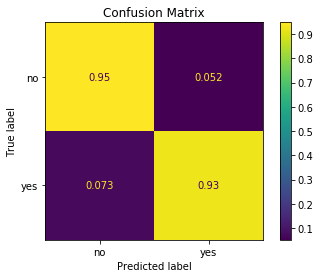

In [122]:
cm = metrics.plot_confusion_matrix(best_grid, X_test_df, y_test,normalize = 'true')
cm.ax_.set_title('Confusion Matrix')                              

In [123]:
#Plot ROC curve for best_grid
fpr_grid, tpr_grid, threshold_grid = metrics.roc_curve(y_test, grid_rf_probs, pos_label = 'yes')
roc_auc = metrics.auc(fpr_grid, tpr_grid)

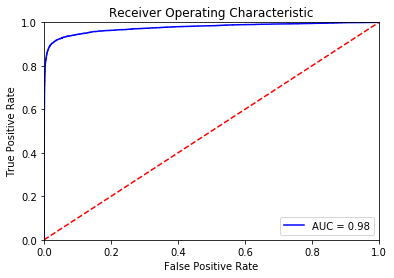

In [124]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_grid, tpr_grid, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()